# Maximum Likelihood Estimation

This a procedure or a method to find the parameters which maximize the likelihood. Let $\theta$ be a parameter of a distribution that generates $x$, $p(x | \theta)$. This is the likelihood is the Bayes rule:

$$p(\theta | x) = \frac{p(x | \theta) p(\theta)}{p(x)}$$

So, we want to know what is the value os $\theta$ which gives the maximum value of the likelihood for our observed data $x$. The likelihood function is:

$$L(\theta,X) = p(X | \theta) = \prod_{i=1}^{N} p(x_{i} | \theta).$$

The log-likelihood is:

$$\mathcal{L}(\theta,X) = \ln{L}(\theta,X) = \sum_{i=1}^{N} \ln{p(x_{i} | \theta)}$$

and we want:

$$\theta_{ml} = argmax_{\theta} L(\theta,X).$$

For known distributions it is possible to find closed forms for the estimator. When that is the case we can find the critical point setting

$$\frac{\partial \mathcal{L}(\theta,X)}{\partial \theta} = 0$$

and solve it for $\theta$.

Let us try an example.

## Maximum Likelihood Estimation for Bernoulli distribution

$Bernoulli(x | \theta) = p(x | \theta) = \theta^{x}(1-\theta)^{1-x}$ where $x \in \lbrace 0,1 \rbrace$

$$L(\theta,X) = \prod_{i=1}^{N}\theta^{x_{i}}(1-\theta)^{1-x_{i}}$$

$$\mathcal{L}(\theta,X) = \sum_{i=1}^{N}\ln{\theta^{x_{i}}} + \sum_{i=1}^{N}(1-\theta)^{1-x_{i}} = \ln{\theta}\sum_{i=1}^{N}x_{i} + \ln{(1-\theta)}\sum_{i=1}^{N}1-x_{i}$$

$$\frac{\partial \mathcal{L}(\theta,X)}{\partial \theta} = \frac{1}{\theta}\sum_{i=1}^{N}x_{i} - \frac{1}{1-\theta}\sum_{i=1}^{N}(1-x_{i})=0$$

Solving it we have

$$\theta_{ml} = \frac{1}{N}\sum_{i=1}^{N}x_{i}$$

This is the maximum likelihood estimator of the Bernoulli distribution parameter $\theta$.

## Simple example of maximum likelihood by brute force

In [1]:
import numpy as np
from scipy.stats import norm,crystalball
import matplotlib.pyplot as plt

In [53]:
def _compute_loglikelihood(model,x):
    return -np.mean(model.logpdf(x))

def compute_loglikelihood(param_vector,x):
    result = {}
    for item in param_vector:
        py = norm(loc=item,scale=0.4)
        result[item] = _compute_loglikelihood(py,x)
    return result

def find_best_param(result,first=True):
    flag = 0 if first==True else -1
    x = sorted(result.items(), key=lambda item: item[1])[flag]
    return {x[0]:x[1]}

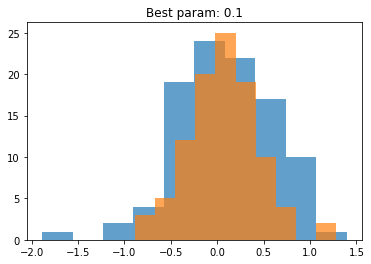

In [54]:
px = norm(loc=0,scale=0.5)
x = px.rvs(size = 100)
result = compute_loglikelihood([-1,-0.5,0.1,0.3,1.0],x)
μ = find_best_param(result)
py = norm(loc=list(μ.keys())[0],scale=0.4)
plt.title(f"Best param: {list(μ.keys())[0]}")
plt.hist(x,label="data",alpha=0.7)
plt.hist(py.rvs(100),label="model",alpha=0.7)
plt.show()

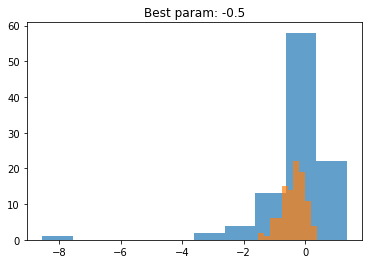

In [55]:
px = crystalball(beta=1.5,m=2.5,loc=0,scale=0.5)
x = px.rvs(size = 100)
result = compute_loglikelihood([-1,-0.5,0.1,0.3,1.0],x)
μ = find_best_param(result)
py = norm(loc=list(μ.keys())[0],scale=0.4)
plt.title(f"Best param: {list(μ.keys())[0]}")
plt.hist(x,label="data",alpha=0.7)
plt.hist(py.rvs(100),label="model",alpha=0.7)
plt.show()

### Usando a regra de Bayes para descobrir um parâmetro

In [190]:
px = norm(loc=-0.2,scale=0.5)
x = px.rvs(200)
px_a =lambda a: norm(loc=a,scale=0.5)

In [194]:
a = 1.0
pa = norm(loc=a,scale=0.5)
score = 0
for i in range(500):
    a = pa.rvs(1000).mean()
    pxa = px_a(a)
    score_ = (pxa.pdf(x).mean()*pa.pdf(a))/px.pdf(x).mean()
    if score_ > score:
        pa = norm(loc=a,scale=0.5)
        score = score_
        
print(a,score)

-0.17513695652847064 0.7979798362224068
